# ML Project Modeling
This file shows and describes the orginal data set modeling process.

In [2]:
import pandas as pd
import numpy as np
import os
import os.path as osp
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
dir_path = os.getcwd()
data_path = osp.abspath(osp.join(dir_path,"Data/"))
df_path = osp.join(data_path,'preprocessed_data.csv')
census_path = osp.join(data_path,'census_2010.csv')


## Census Data Frame

In [27]:
# reading Census frame
census_df = pd.read_csv(census_path)
print(list(census_df.columns))
census_df.head()

['Area Name-Legal/Statistical Area Description', 'Qualifying Name', 'Area (Land)', 'Area (Water)', 'Summary Level', 'Geographic Component', 'Region', 'Division', 'FIPS', 'State (FIPS)', 'County', 'Census Tract', 'Block', 'Total Population', 'Total Population.1', 'Total Population: Male', 'Total Population: Male: Under 5 years', 'Total Population: Male: 5 to 9 years', 'Total Population: Male: 10 to 14 years', 'Total Population: Male: 15 to 17 years', 'Total Population: Male: 18 to 24 years', 'Total Population: Male: 25 to 34 years', 'Total Population: Male: 35 to 44 years', 'Total Population: Male: 45 to 54 years', 'Total Population: Male: 55 to 64 years', 'Total Population: Male: 65 and 74 years', 'Total Population: Male: 75 to 84 years', 'Total Population: Male: 85 years and over', 'Total Population: Female', 'Total Population: Female: Under 5 years', 'Total Population: Female: 5 to 9 years', 'Total Population: Female: 10 to 14 years', 'Total Population: Female: 15 to 17 years', 'Tota

,Area Name-Legal/Statistical Area Description,Qualifying Name,Area (Land),Area (Water),Summary Level,Geographic Component,Region,Division,FIPS,State (FIPS),...,Total population: Two or More Races,Households,Households: Family households,Households: Family households: Married-couple family,Households: Family households: Other family,"Households: Family households: Other family: Male householder, no wife present","Households: Family households: Other family: Female householder, no husband present",Households: Nonfamily households,Households: Nonfamily households: Householder living alone,Households: Nonfamily households: Householder not living alone
0,Block 1000,"Block 1000, Block Group 1, Census Tract 402.02...",14407,0,100,0,3,5,1.306300e+14,13,...,0,0,0,0,0,0,0,0,0,0
1,Block 1001,"Block 1001, Block Group 1, Census Tract 402.02...",8728,0,100,0,3,5,1.306300e+14,13,...,0,0,0,0,0,0,0,0,0,0
2,Block 1002,"Block 1002, Block Group 1, Census Tract 402.02...",8711,0,100,0,3,5,1.306300e+14,13,...,0,0,0,0,0,0,0,0,0,0
3,Block 1003,"Block 1003, Block Group 1, Census Tract 402.02...",8908,0,100,0,3,5,1.306300e+14,13,...,0,0,0,0,0,0,0,0,0,0
4,Block 1004,"Block 1004, Block Group 1, Census Tract 402.02...",17117,0,100,0,3,5,1.306300e+14,13,...,0,0,0,0,0,0,0,0,0,0


## MARTA Data
This data was created using our data set and the preprocess data file. Referrer to there for any indications of what columns are created from what data.

In [23]:
data_df = pd.read_csv(df_path)
data_df.UID = data_df.UID.str.replace("(",'')
data_df.UID = data_df.UID.str.replace(")",'')
data_df.UID = data_df.UID.str.split(',')
#data_df.UID = data_df.UID.apply(lambda x: [int(i) for i in x])
# extracting county
data_df.insert(len(data_df.columns),'COUNTY',data_df.UID.apply(lambda x: x[0]))
# extracting census tract
data_df.insert(len(data_df.columns),'TRACT',data_df.UID.apply(lambda x: x[1]))
# extracting Block
data_df.insert(len(data_df.columns),'BLOCK',data_df.UID.apply(lambda x: x[2]))
data_df.COUNTY = data_df.COUNTY.str.replace("'",'')
data_df.TRACT = data_df.TRACT.str.replace("'",'')
data_df.BLOCK = data_df.BLOCK.str.replace("'",'')
# changing datatypes
data_df.COUNTY = data_df.COUNTY.astype('int32')
data_df.TRACT = data_df.TRACT.astype('int32')
data_df.BLOCK = data_df.BLOCK.astype('int32')
data_df = data_df.drop(['UID'],axis=1)
data_df.head()

,stop_id,TRIPS,COUNTY,TRACT,BLOCK
0,1,2,63,40202,1038
1,1,2,63,40202,1087
2,1,2,63,40202,2011
3,1,1,63,40203,2001
4,1,1,63,40204,1001


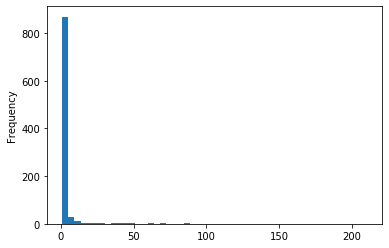

In [84]:
data_df.TRIPS.plot.hist(bins=50)

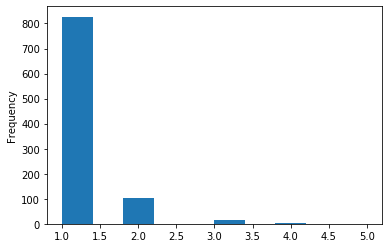

In [85]:
data_df.stop_id.plot.hist(bins=10)

In [25]:
data_df.TRIPS.sum()

3773

In [26]:
data_df.stop_id.sum()

1095

## Merging The Datasets

In [31]:
din = data_df.merge(census_df, left_on=['COUNTY','TRACT','BLOCK'], right_on=['County','Census Tract','Block'])
drop_cols = ['Area Name-Legal/Statistical Area Description', 'Qualifying Name', 'Area (Land)', 'Area (Water)',
             'Summary Level', 'Geographic Component', 'Region',
             'Division', 'FIPS', 'State (FIPS)', 'County', 'Census Tract', 'Block']
din = din.drop(drop_cols, axis=1)
din.head()

,stop_id,TRIPS,COUNTY,TRACT,BLOCK,Total Population,Total Population.1,Total Population: Male,Total Population: Male: Under 5 years,Total Population: Male: 5 to 9 years,...,Total population: Two or More Races,Households,Households: Family households,Households: Family households: Married-couple family,Households: Family households: Other family,"Households: Family households: Other family: Male householder, no wife present","Households: Family households: Other family: Female householder, no husband present",Households: Nonfamily households,Households: Nonfamily households: Householder living alone,Households: Nonfamily households: Householder not living alone
0,1,2,63,40202,1038,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,2,63,40202,1087,22,22,7,2,0,...,0,8,7,0,7,1,6,1,1,0
2,1,2,63,40202,2011,26,26,18,3,2,...,0,6,4,3,1,0,1,2,2,0
3,1,1,63,40203,2001,508,508,247,32,25,...,17,152,116,25,91,26,65,36,25,11
4,1,1,63,40204,1001,1076,1076,476,46,41,...,29,416,257,107,150,25,125,159,123,36


## Data Description
The following tables describe all of the raw data before transformation that is to be analyzed.

In [148]:
din.iloc[:,0:10].describe()


,stop_id,TRIPS,COUNTY,TRACT,BLOCK,Total Population,Total Population.1,Total Population: Male,Total Population: Male: Under 5 years,Total Population: Male: 5 to 9 years
count,946.000000,946.000000,946.000000,946.000000,946.000000,946.000000,946.000000,946.000000,946.000000,946.000000
mean,1.154334,3.984144,105.934461,18087.793869,2000.719873,222.412262,222.412262,105.943975,9.127907,7.564482
std,0.438211,12.722382,18.823770,55167.207070,1008.167327,400.552438,400.552438,194.430918,20.229935,16.454863
min,1.000000,1.000000,63.000000,100.000000,1000.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,1.000000,89.000000,7730.000000,1016.000000,2.000000,2.000000,0.000000,0.000000,0.000000
50%,1.000000,1.000000,121.000000,10604.000000,2004.000000,61.000000,61.000000,27.500000,1.000000,1.000000
75%,1.000000,2.000000,121.000000,22301.750000,3001.000000,229.250000,229.250000,105.000000,8.000000,6.000000
max,5.000000,210.000000,121.000000,980000.000000,6006.000000,3498.000000,3498.000000,1673.000000,198.000000,161.000000


In [149]:
din.iloc[:,10:20].describe()

,Total Population: Male: 10 to 14 years,Total Population: Male: 15 to 17 years,Total Population: Male: 18 to 24 years,Total Population: Male: 25 to 34 years,Total Population: Male: 35 to 44 years,Total Population: Male: 45 to 54 years,Total Population: Male: 55 to 64 years,Total Population: Male: 65 and 74 years,Total Population: Male: 75 to 84 years,Total Population: Male: 85 years and over
count,946.000000,946.000000,946.000000,946.000000,946.000000,946.000000,946.000000,946.000000,946.000000,946.000000
mean,6.527484,3.971459,13.946089,21.681818,15.964059,12.623679,8.447146,3.934461,1.633192,0.522199
std,14.318737,8.540487,41.563393,49.044556,31.920649,22.468744,13.946150,8.018229,3.968356,2.134631
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,1.000000,2.000000,4.000000,3.000000,3.500000,3.000000,1.000000,0.000000,0.000000
75%,6.000000,3.750000,11.000000,16.000000,16.000000,14.000000,10.000000,4.000000,2.000000,0.000000
max,150.000000,85.000000,828.000000,484.000000,307.000000,213.000000,116.000000,82.000000,59.000000,25.000000


In [150]:
din.iloc[:,20:30].describe()

,Total Population: Female,Total Population: Female: Under 5 years,Total Population: Female: 5 to 9 years,Total Population: Female: 10 to 14 years,Total Population: Female: 15 to 17 years,Total Population: Female: 18 and 24 years,Total Population: Female: 25 to 34 years,Total Population: Female: 35 to 44 years,Total Population: Female: 45 to 54 years,Total Population: Female: 55 to 64 years
count,946.000000,946.000000,946.000000,946.000000,946.000000,946.000000,946.000000,946.000000,946.000000,946.000000
mean,116.468288,8.741015,7.199789,6.323467,4.086681,14.456660,23.343552,16.362579,14.452431,10.917548
std,214.447417,19.193351,15.669849,13.745726,8.945508,33.516745,49.210522,33.145736,27.879225,19.986121
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,31.000000,2.000000,1.000000,1.000000,1.000000,2.000000,4.000000,3.000000,4.000000,3.000000
75%,124.000000,7.000000,6.000000,6.000000,4.000000,11.000000,18.750000,16.000000,15.000000,12.000000
max,2075.000000,165.000000,164.000000,155.000000,91.000000,449.000000,415.000000,362.000000,284.000000,175.000000


In [151]:
din.iloc[:,30:40].describe()

,Total Population: Female: 65 and 74 years,Total Population: Female: 75 to 84 years,Total Population: Female: 85 years and over,Total Population.2,Total Population: Under 5 years,Total Population: 5 to 9 years,Total Population: 10 to 14 years,Total Population: 15 to 17 years,Total Population: 18 to 24 years,Total Population: 25 to 34 years
count,946.000000,946.000000,946.000000,946.000000,946.000000,946.000000,946.000000,946.000000,946.000000,946.00000
mean,5.581395,3.213531,1.789641,222.412262,17.868922,14.764271,12.850951,8.058140,28.402748,45.02537
std,12.222809,8.964767,8.263590,400.552438,39.152473,31.847793,27.808947,17.143089,67.493770,95.37185
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
50%,1.000000,1.000000,0.000000,61.000000,3.000000,3.000000,2.000000,2.000000,5.000000,8.00000
75%,5.000000,3.000000,1.000000,229.250000,15.000000,12.000000,11.000000,7.000000,22.000000,35.00000
max,144.000000,153.000000,127.000000,3498.000000,360.000000,325.000000,305.000000,172.000000,830.000000,720.00000


In [152]:
din.iloc[:,40:50].describe()

,Total Population: 35 to 44 years,Total Population: 45 to 54 years,Total Population: 55 to 64 years,Total Population: 65 and 74 years,Total Population: 75 to 84 years,Total Population: 85 years and over,Total population,Total population: White alone,Total population: Black or African American alone,Total population: American Indian and Alaska Native alone
count,946.000000,946.000000,946.000000,946.000000,946.000000,946.000000,946.000000,946.000000,946.000000,946.000000
mean,32.326638,27.076110,19.364693,9.515856,4.846723,2.311839,222.412262,43.426004,150.179704,0.976744
std,62.353287,48.541092,33.223043,19.745585,12.612783,10.112960,400.552438,122.732312,311.579787,4.502261
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000
50%,7.000000,8.000000,6.000000,3.000000,1.000000,0.000000,61.000000,3.000000,40.000000,0.000000
75%,31.000000,29.000000,23.000000,10.000000,4.000000,1.000000,229.250000,20.000000,134.750000,0.000000
max,554.000000,440.000000,265.000000,217.000000,212.000000,149.000000,3498.000000,1236.000000,3281.000000,90.000000


In [155]:
din.iloc[:,50:].describe()

,Total population: Asian alone,Total population: Native Hawaiian and Other Pacific Islander alone,Total population: Some Other Race alone,Total population: Two or More Races,Households,Households: Family households,Households: Family households: Married-couple family,Households: Family households: Other family,"Households: Family households: Other family: Male householder, no wife present","Households: Family households: Other family: Female householder, no husband present",Households: Nonfamily households,Households: Nonfamily households: Householder living alone,Households: Nonfamily households: Householder not living alone
count,946.000000,946.000000,946.000000,946.000000,946.000000,946.000000,946.000000,946.000000,946.000000,946.000000,946.000000,946.000000,946.000000
mean,8.785412,0.127907,13.451374,5.465116,93.898520,46.120507,19.729387,26.391121,5.330867,21.060254,47.778013,38.295983,9.482030
std,35.995994,1.438519,66.626355,14.662386,174.825059,86.761732,37.313837,56.184233,11.120382,47.109032,104.176780,85.087774,21.904994
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,24.000000,14.000000,5.000000,7.000000,1.000000,5.000000,8.000000,6.000000,2.000000
75%,2.000000,0.000000,3.000000,5.000000,95.750000,47.000000,19.000000,24.000000,5.000000,18.000000,43.000000,32.750000,8.000000
max,576.000000,41.000000,850.000000,258.000000,1398.000000,834.000000,341.000000,625.000000,99.000000,548.000000,1059.000000,877.000000,206.000000


## Preparing for Machine Learning
1. We remove the County, TRACT, BLOCK Columns
2. We remove duplicate columns like Total Population.1
3. We split up the data frame into X and y
4. We scale each column to -1 to 1


In [36]:
from sklearn import preprocessing

In [108]:
# droping un-needed columns
pipe_df = din.drop(columns=['COUNTY','TRACT','BLOCK','Total Population.1','Total Population.2'],axis=1)
#Spliting into X, and y
X_df = pipe_df.drop(columns=['TRIPS'])
y = pipe_df.TRIPS
scaler = preprocessing.StandardScaler()
X = scaler.fit_transform(X_df)
X1 = scaler.fit_transform(pipe_df)

## Preliminary Analysis and Feature Engineering 
1. Compute correlations of each variables with the number of trips
    - Make a graph of this
2. Compute covariance matrix
    - make a heatmap of this
3. Perform a Principle Component analysis and analyze the results
    - make a graph of the final one
    - make a bar graph for potentially the one

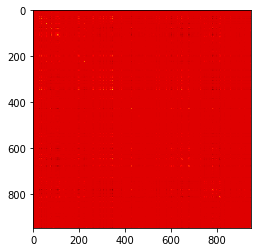

In [109]:
plt.imshow(np.cov(X1),cmap='hot')

### Covariance Analysis
We do not see any standouts in our covariance matrix

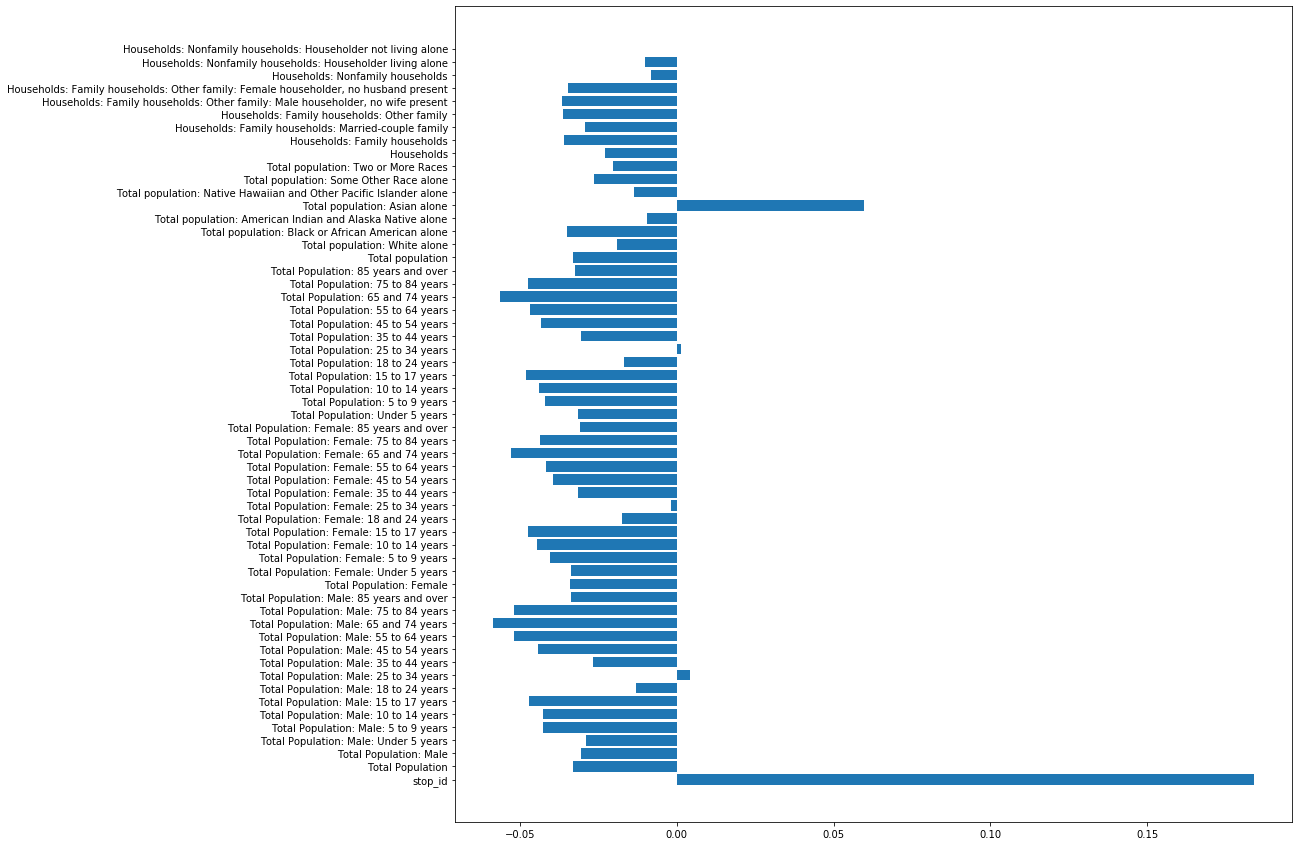

In [110]:
# getting all cor coef
corrs = []
for i in range(0,X.shape[1]):
    corrs.append(np.corrcoef(y.to_numpy(),X[:,i])[0,1])
fig, ax = plt.subplots(figsize=(15,15))

ax = plt.barh(X_df.columns,corrs)

### Correlation Analysis
- need to add in statistical significance 
1. Positively correlated
    - Number of stops correlated with the number of trips
    - Total population of Males 25 to 34 years is correlated
    - Total population of Asians is correlated as well
2. Negatively Correlated
    - population 65 +

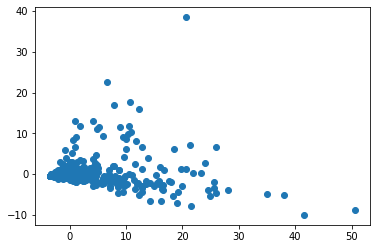

In [114]:
# implement PCA here
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
fig, ax = plt.subplots()
pc = pca.fit_transform(X)
ax = plt.scatter(pc[:,0],pc[:,1])

### Priniciple Component Analysis
- Our prinicple component analysis indicates that there are no clear clusters in the data set as is. We need furhter analysis to see if we can find any features of interest

In [115]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
rf = RandomForestRegressor(n_estimators=100)
sum(cross_val_score(rf,X,y,cv=10,scoring='r2'))/10

-1.150764996731069

The initial cross validation score depects a inadequate model that has to many variables that don't inform of the numbers. We believe that we should

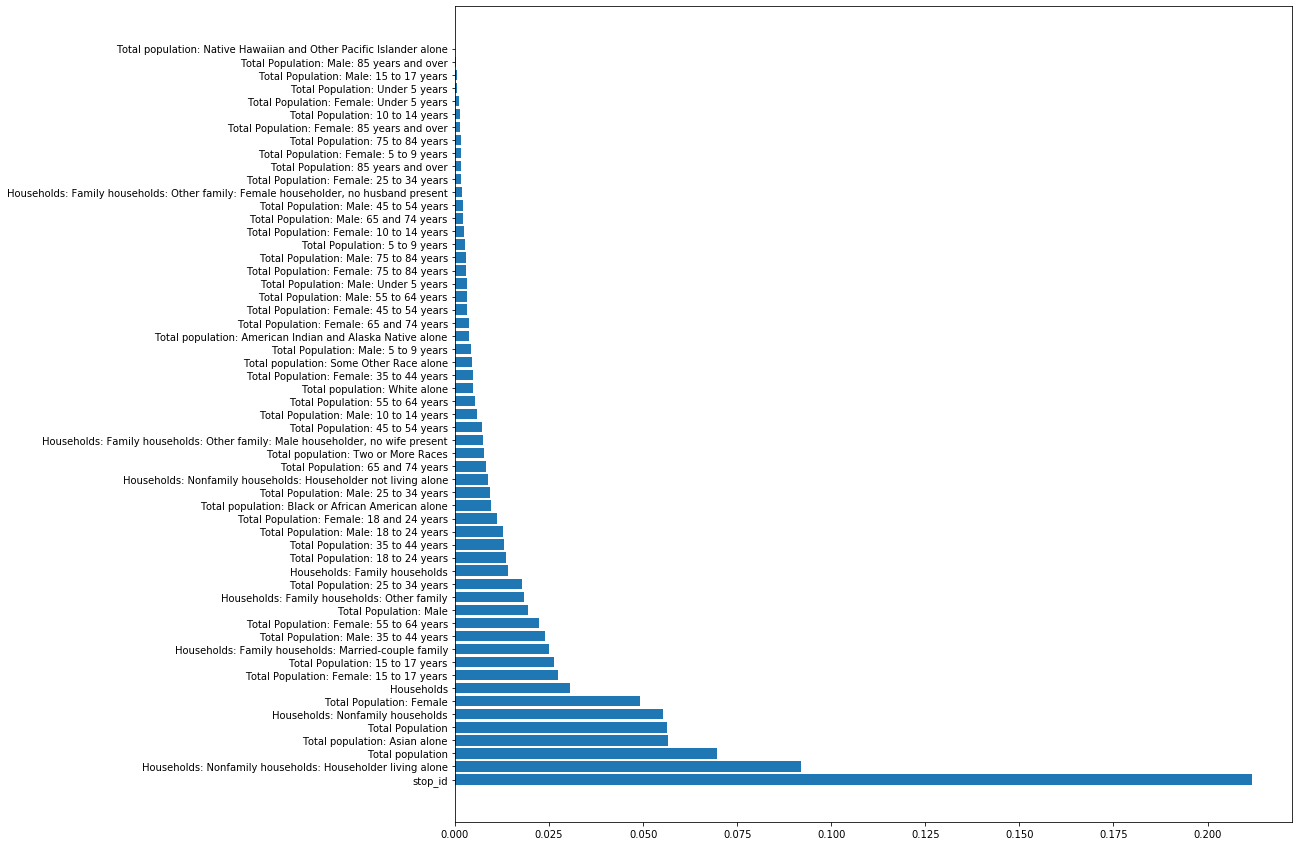

In [116]:
rf = RandomForestRegressor(n_estimators=100)
rf.fit(X,y)
vif = pd.DataFrame(rf.feature_importances_,index=X_df.columns)
vif.sort_values(by=0,ascending=False,inplace=True)
fig, ax = plt.subplots(figsize=(15,15))
ax = plt.barh(vif.index,vif[0])

### Analyzing Variable Importance
1. We notice a wwide range in the variable importance factors with a lot of variables not having any influence of the task at all
2. We will drop some of these factors
3. We might need to fetch some more detailed data taht is related to income as well as
4. We can add in additional more exlanatory variables as well

We will conduct a similar analysis using a lasso regression to do some variable selection. Following this variable selection process we will construct new variables.

In [117]:
from sklearn.linear_model import Lasso

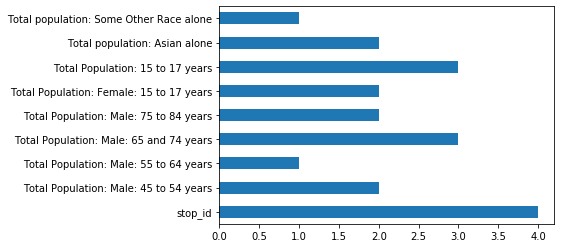

In [135]:
alphas = [0.25, 0.5, 0.75, 1]
coefs = []
for alpha in alphas:
    las_reg = Lasso(alpha=alpha)
    las_reg.fit(X,y)
    coefs.append(las_reg.coef_)
#fig, ax = plt.subplots()
coefs = pd.DataFrame(data=coefs,index=alphas,columns=X_df.columns)
coef_bool = coefs.applymap(lambda x: x != 0)
temp = coef_bool.sum()
temp[temp != 0].plot.barh()
#fig, ax = plt.subplots(figsize=(10,10))

### Lasso Variable Analysis
#### Process
We selected a series of alpha values form 0.25 to 1 by 1/4. We then saw when the coefficients were not 0 in each of the models. We then see the number of individuals.
#### Results
 - We find again that stop_id is important
 - We suggest potentially binning population into under 20, 20-35, 35-65, 65+, we can potentially remove
 - While these type of regressors are generally resistant to outliers, a complete outlier analysis would be helpful as well
 - Additional variables of interest
     - Rail Stops
     - Bus Stops
     - Adjacent Census Tract Stops
     - Income
         - median income
         - percent under 25,000 dollar a year - Car slightly affordable
         - percent under 30,000 dollars a year - Car more affordable
     - Race
         - majority white
         - majority black
         - neither
 - We will explore using the total population variable and then transitioning other variables to precentages
 - We can also change our scaling process as well
         
 

In [141]:
200/.1 * 12

24000.0

## Model Building
1. Select Two Model Selection Procedures
    - 10 fold cross validation
    - monte carlo cross validation
2. Parameter Tuning Procedure
    - Exhaustive grid search ? 
3. Model Selection
    - Elastic Net - Choose L1, L2
    - Linear Regression - Benchmark Model (is it significant)
    - Lasso Regression - Choose - L2
    - Ridge Regression - Choose - L1
    - Random Forest Regression - figure out how to train in parallel on MAC
    - SVR - choose kernels
    - KNR - choose the number 
    

## Analysis 
1. Comment on Model Selection Results
    - Create a bar graph of all of the RMSE for each graph
2. Comment on Variable Importance from the model of choice
    - Create a bar graph of VIF if Random Forest wins
3. Comment on the effect of increasing the number of stops in a census block
    - Create a graphic on the projected increase in the number of riders
4. Determine if we need to add in duration to get more significant results
    - Create a graphic with this